# The Boston Housing Dataset

The Boston Housing Dataset is a derived from information collected by the U.S. Census Service concerning housing in the area of Boston MA. The following describes the dataset columns:

CRIM - per capita crime rate by town


ZN - proportion of residential land zoned for lots over 25,000 sq.ft.


INDUS - proportion of non-retail business acres per town.


CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)


NOX - nitric oxides concentration (parts per 10 million)


RM - average number of rooms per dwelling


AGE - proportion of owner-occupied units built prior to 1940


DIS - weighted distances to five Boston employment centres


RAD - index of accessibility to radial highways


TAX - full-value property-tax rate per $10,000


PTRATIO - pupil-teacher ratio by town


B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town


LSTAT - % lower status of the population


MEDV - Median value of owner-occupied homes in $1000's

---

In [4]:
import numpy as np
import pandas as pd
from pandas import read_csv
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
dataset = read_csv('/Users/pavanwalvekar/Documents/Data Glacier Intern/WEEK 4 - Article Writing/Boston housing prices/housing.csv', header=None, delimiter=r"\s+", names=column_names)

In [5]:
print(dataset.head(5))

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  


In [6]:
print(np.shape(dataset))

(506, 14)


In [7]:
print(dataset.describe())

             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.1057

---

Initially, there are two data columns that present intriguing summaries. The first column, ZN, represents the proportion of residential land designated for lots larger than 25,000 square feet. The 25th and 50th percentiles have a value of 0 for this column. The second column, CHAS, is a categorical variable indicating whether a particular tract is adjacent to the Charles River, with values of 1 if it does and 0 if it doesn't. In this case, the 25th, 50th, and 75th percentiles all have a value of 0 for CHAS. These summaries suggest that these columns may not be particularly useful for a regression task, such as predicting the median value of owner-occupied homes (MEDV).

Another intriguing aspect of the dataset is the maximum value of MEDV. According to the original data description, variable #14 appears to be limited or "censored" at 50.00, which corresponds to a median price of $50,000. Based on this information, values above 50.00 may not provide valuable insights for predicting MEDV. To gain further insights, we can visualize the dataset and examine noteworthy trends and statistics.

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

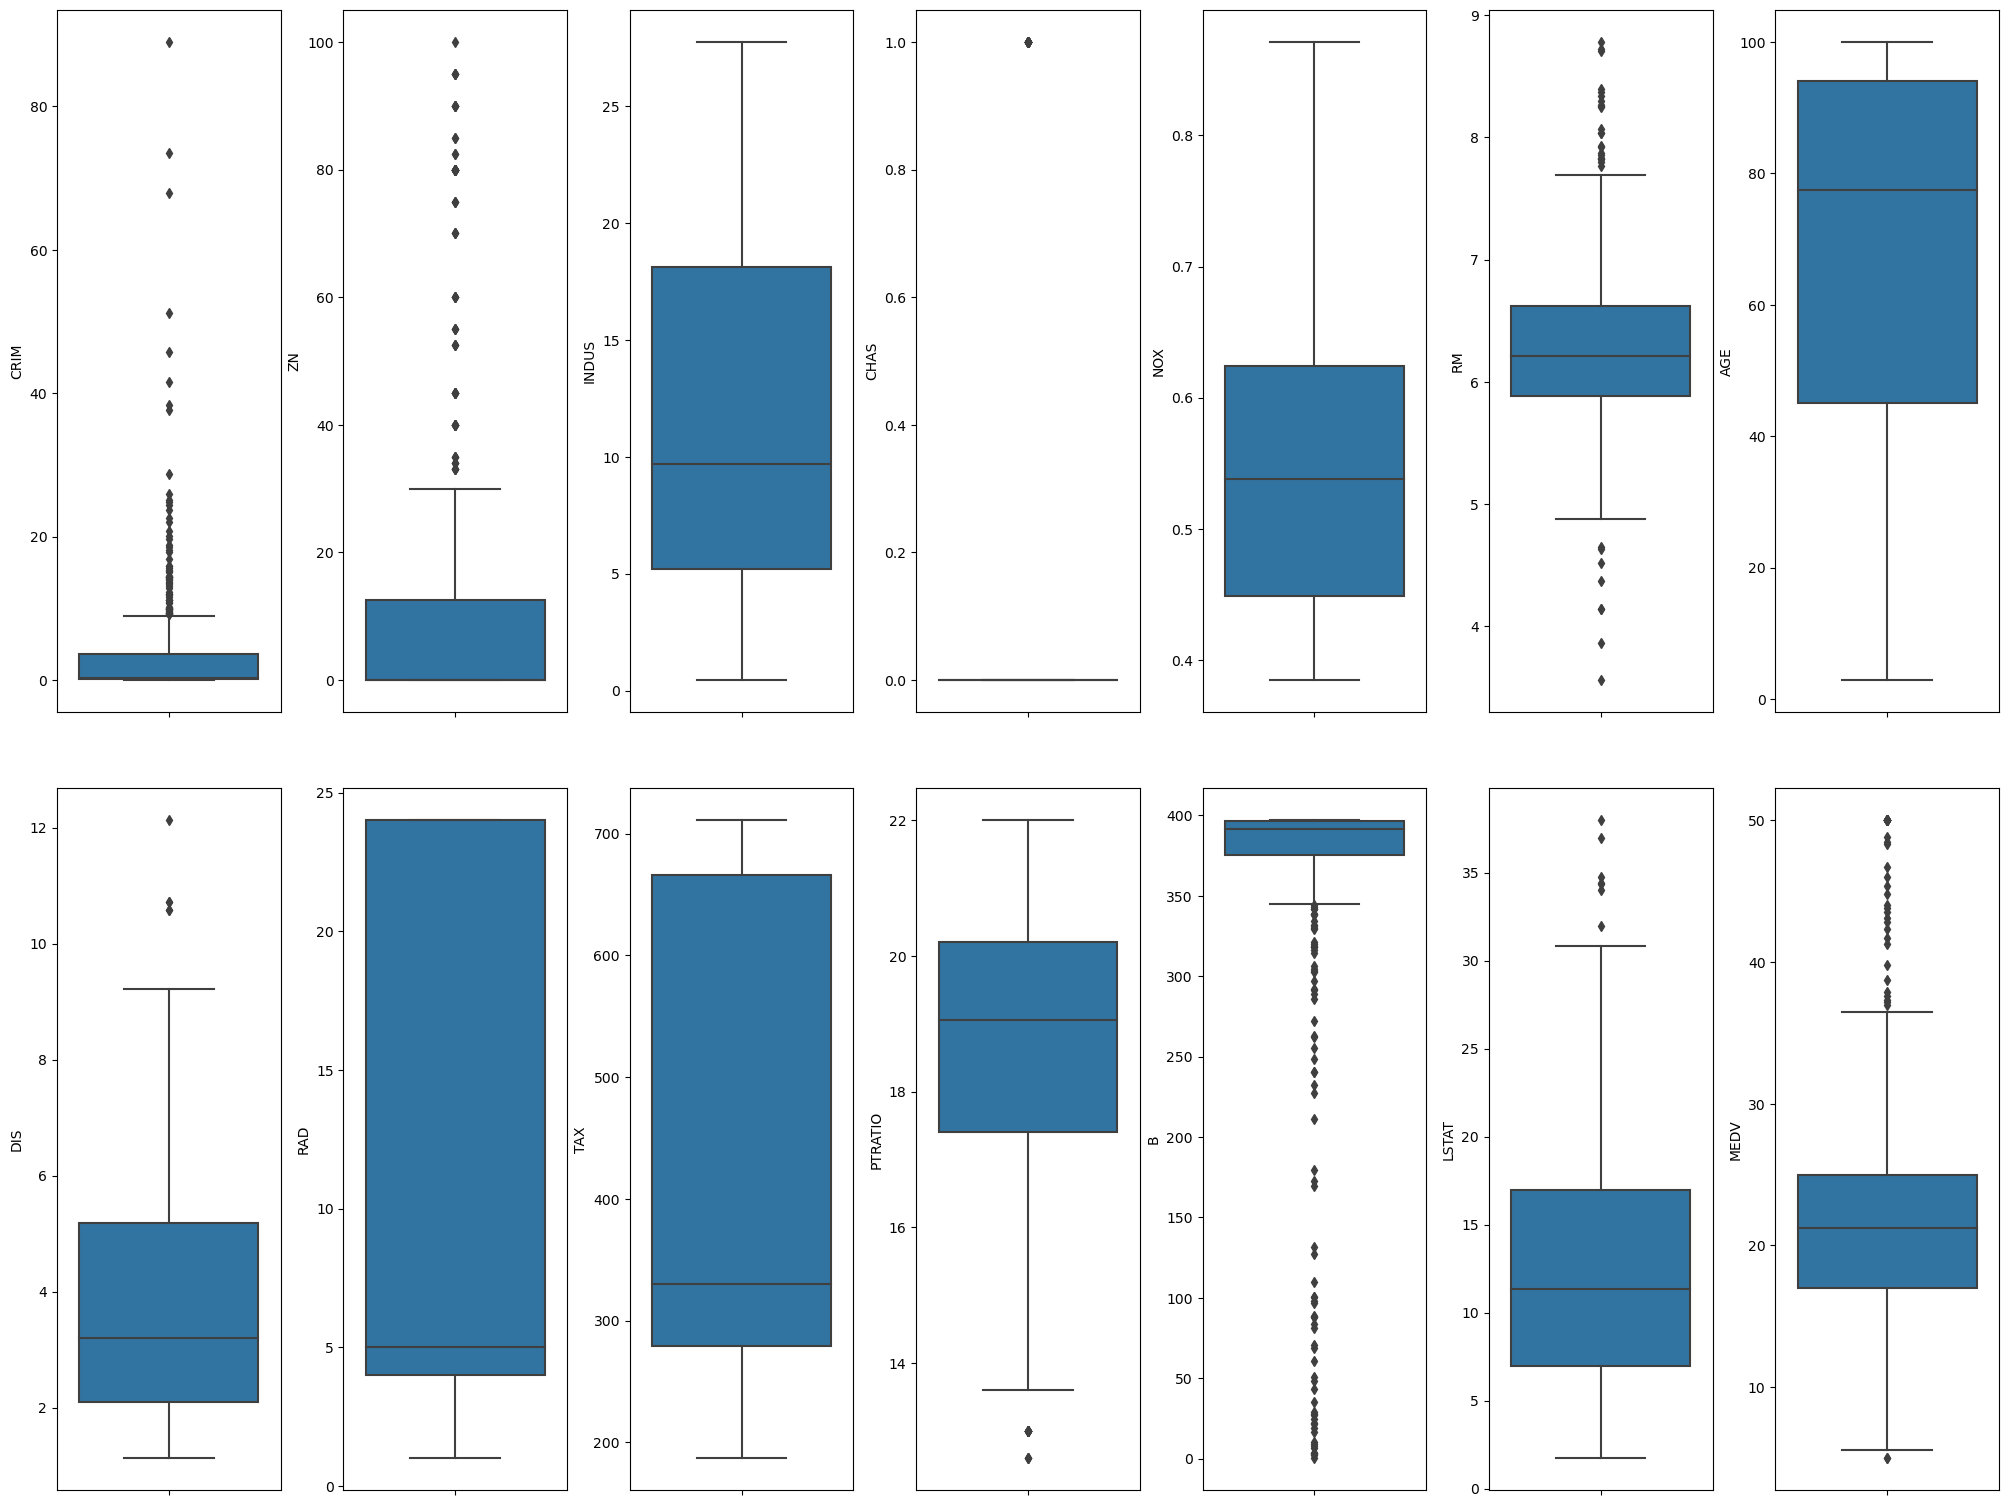

In [10]:
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 15))
index = 0
axs = axs.flatten()
for p,s in dataset.items():
    sns.boxplot(y=p, data=dataset, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

---

Outliers percentage in every column

In [12]:
for p, s in data.items():
        w1 = s.quantile(0.25)
        w3 = s.quantile(0.75)
        irq = w3 - w1
        s_col = s[(s <= w1 - 1.5 * irq) | (s >= w3 + 1.5 * irq)]
        percentage = np.shape(s_col)[0] * 100.0 / np.shape(dataset)[0]
        print("Column %s outliers = %.2f%%" % (p, percentage))

Column CRIM outliers = 13.04%
Column ZN outliers = 13.44%
Column INDUS outliers = 0.00%
Column CHAS outliers = 100.00%
Column NOX outliers = 0.00%
Column RM outliers = 5.93%
Column AGE outliers = 0.00%
Column DIS outliers = 0.99%
Column RAD outliers = 0.00%
Column TAX outliers = 0.00%
Column PTRATIO outliers = 2.96%
Column B outliers = 15.22%
Column LSTAT outliers = 1.38%
Column MEDV outliers = 7.91%


---

Removing MEDV outliers

In [13]:
dataset = dataset[~(dataset['MEDV'] >= 50.0)]
print(np.shape(dataset))

(490, 14)


Now, let's observe the distributions of these features, along with the distribution of MEDV, to get a visual representation of how they are spread across the dataset.

/var/folders/y7/4mcg4jwx3qb0mpk5g_rnrsd80000gn/T/ipykernel_89101/120874366.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(s, ax=axs[index])
/var/folders/y7/4mcg4jwx3qb0mpk5g_rnrsd80000gn/T/ipykernel_89101/120874366.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(s, ax=axs[index])
/var/f

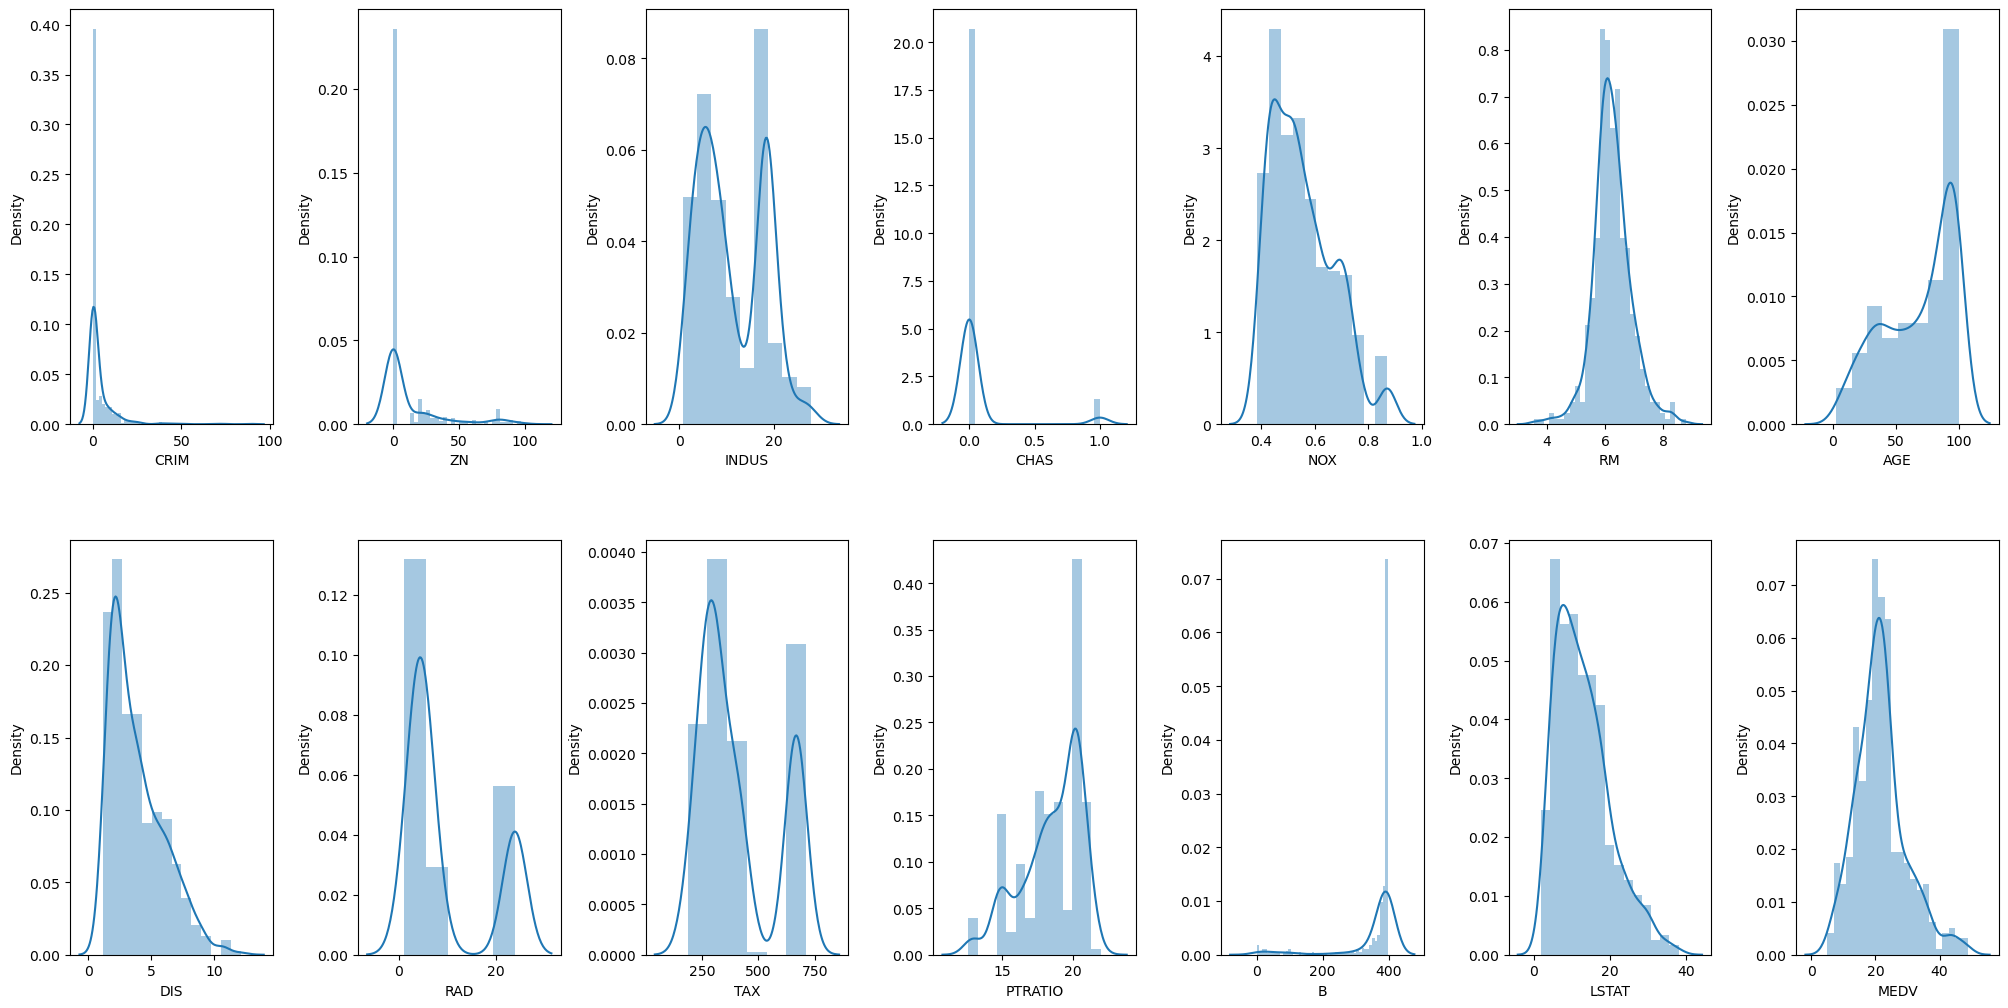

In [14]:
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for p,s in dataset.items():
    sns.distplot(s, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

The histogram reveals that the columns CRIM, ZN, and B exhibit highly skewed distributions. On the other hand, MEDV appears to follow a normal distribution, indicating that the predictions are normally distributed. The remaining columns exhibit either normal or bimodal distributions, except for CHAS, which is a discrete variable.

---

Plotting the pairwise correlation

<Axes: >

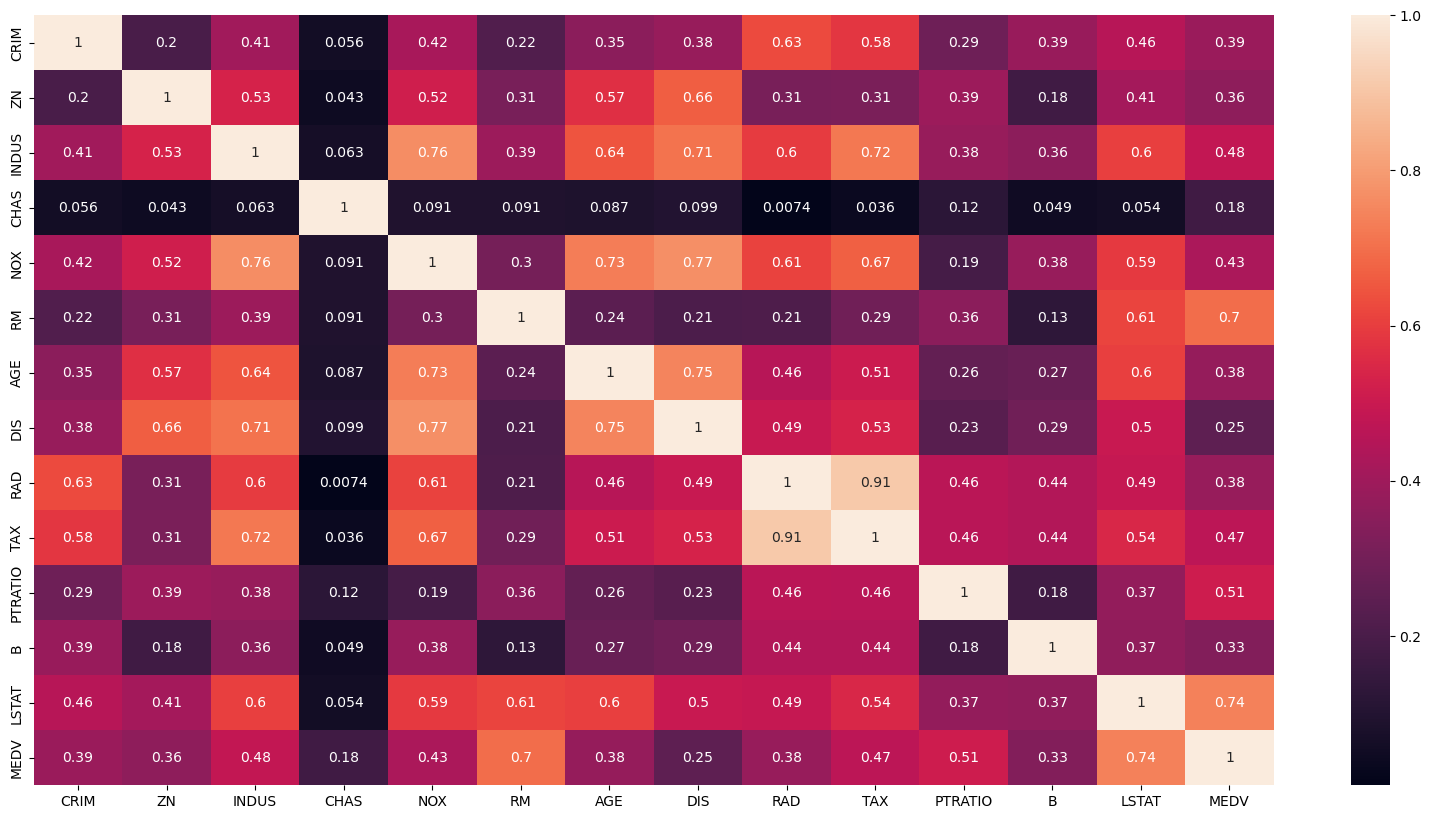

In [15]:
plt.figure(figsize=(20, 10))
sns.heatmap(data.corr().abs(),  annot=True)

The correlation matrix reveals a strong correlation between the features TAX and RAD. Additionally, the columns LSTAT, INDUS, RM, TAX, NOX, and PTRATIO exhibit a correlation score above 0.5 with MEDV, which indicates their potential usefulness as predictors. Now, let's create visual plots of these columns in relation to MEDV to further explore their relationships.

In [16]:
from sklearn import preprocessing

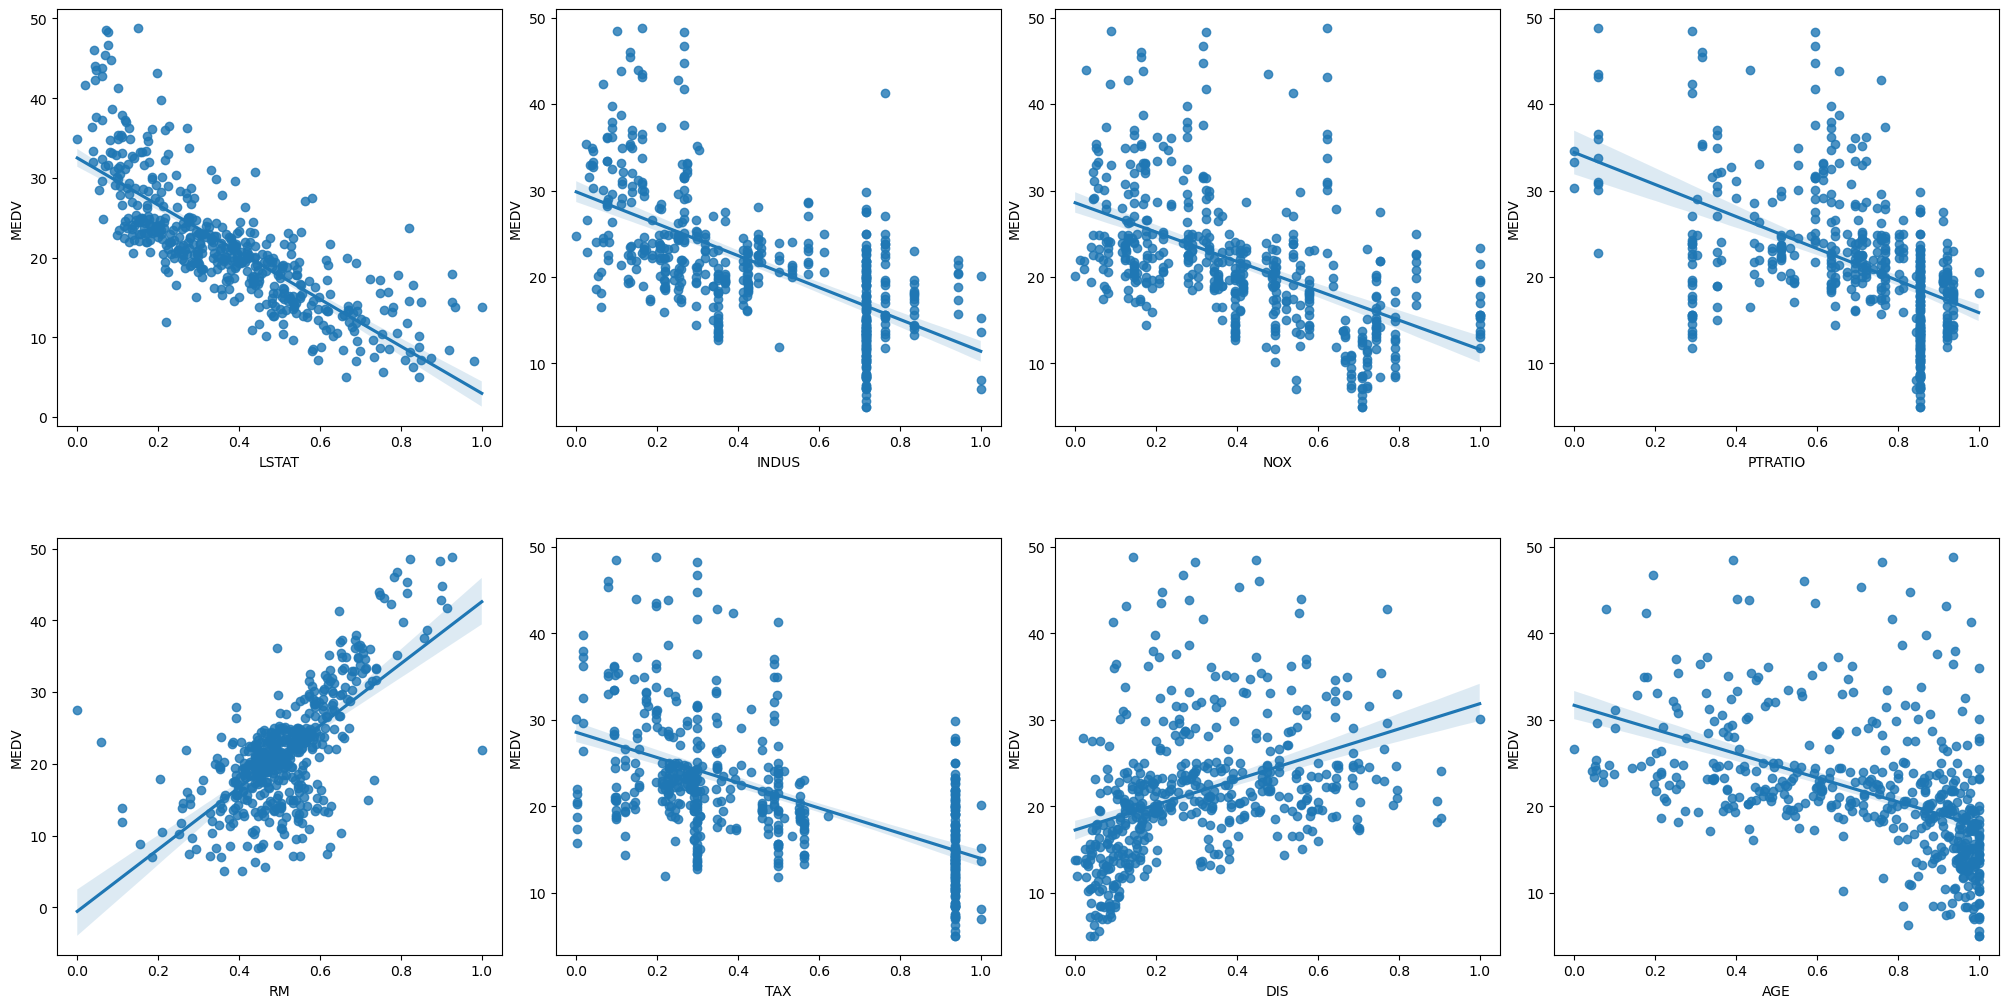

In [26]:
min_max_scaler = preprocessing.MinMaxScaler()
columns = ['LSTAT', 'INDUS', 'NOX', 'PTRATIO', 'RM', 'TAX', 'DIS', 'AGE']
x = dataset.loc[:,columns]
y = dataset['MEDV']
x = pd.DataFrame(data=min_max_scaler.fit_transform(a), columns=columns)
fig, axs = plt.subplots(ncols=4, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for p, s in enumerate(columns):
    sns.regplot(y=y, x=x[s], ax=axs[p])
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

Based on our analysis, we can attempt to predict MEDV using the following features: 'LSTAT', 'INDUS', 'NOX', 'PTRATIO', 'RM', 'TAX', 'DIS', and 'AGE'. To address the skewness in the data, we can apply a log transformation.

In [27]:
y =  np.log1p(y)
for col in x.columns:
    if np.abs(x[col].skew()) > 0.3:
        x[col] = np.log1p(x[col])

Trying linear and ridge regression

In [28]:
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import numpy as np

In [33]:
linear_regression = linear_model.LinearRegression()
kf = KFold(n_splits=10)
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
scores = cross_val_score(linear_regression, x_scaled, y, cv=kf, scoring='neg_mean_squared_error')
print("MSE: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

scores_mapping = {}
scores_mapping['LinearRegression'] = scores
linear_ridge = linear_model.Ridge()
scores = cross_val_score(linear_ridge, x_scaled, y, cv=kf, scoring='neg_mean_squared_error')
scores_mapping['Ridge'] = scores
print("MSE: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

MSE: -0.04 (+/- 0.04)
MSE: -0.04 (+/- 0.04)


In [36]:
# Trying polinomial regression with L2 with degree
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
model = make_pipeline(PolynomialFeatures(degree=3), linear_model.Ridge())
scores = cross_val_score(model, x_scaled, y, cv=kf, scoring='neg_mean_squared_error')
scores_mapping['PolyRidge'] = scores
print("MSE: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

MSE: -0.03 (+/- 0.03)


The performance of linear regression, both with and without L2 regularization, shows minimal difference in terms of the mean squared error (MSE) score. However, when using polynomial regression with a degree of 3, the MSE improves. Now, let's explore some non-parametric regression techniques such as SVR with the RBF kernel, DecisionTreeRegressor, and KNeighborsRegressor to further improve our predictions.

In [37]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

In [38]:
svr = SVR(kernel='rbf', C=1e3, gamma=0.1)

scores = cross_val_score(svr, x_scaled, y, cv=kf, scoring='neg_mean_squared_error')
scores_mapping['SVR'] = scores
print("MSE: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

MSE: -0.04 (+/- 0.03)


In [39]:
from sklearn.tree import DecisionTreeRegressor

In [40]:
desc_tree = DecisionTreeRegressor(max_depth=5)
scores = cross_val_score(desc_tree, x_scaled, y, cv=kf, scoring='neg_mean_squared_error')
scores_mapping['DecisionTreeRegressor'] = scores
print("MSE: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

MSE: -0.05 (+/- 0.04)


In [41]:
from sklearn.neighbors import KNeighborsRegressor

In [42]:
kNN = KNeighborsRegressor(n_neighbors=7)
scores = cross_val_score(kNN, x_scaled, y, cv=kf, scoring='neg_mean_squared_error')
scores_mapping['KNeighborsRegressor'] = scores
print("KNN Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

KNN Accuracy: -0.05 (+/- 0.03)


Among the three models selected through grid search, SVR demonstrates superior performance. To further enhance our predictions, let's employ an ensemble method as our final approach.

In [43]:
from sklearn.ensemble import GradientBoostingRegressor

In [44]:
Gradient = GradientBoostingRegressor(alpha=0.9,learning_rate=0.05, max_depth=2, min_samples_leaf=5, min_samples_split=2, n_estimators=100, random_state=30)
scores = cross_val_score(Gradient, x_scaled, y, cv=kf, scoring='neg_mean_squared_error')
scores_mapping['GradientBoostingRegressor'] = scores
print("MSE: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

MSE: -0.03 (+/- 0.02)



To assess the distribution of results and determine which model exhibits better performance, we will plot the k-fold results. Specifically, we will examine the mean squared error (MSE) distribution of these models using a k-fold value of 10.

<Axes: >

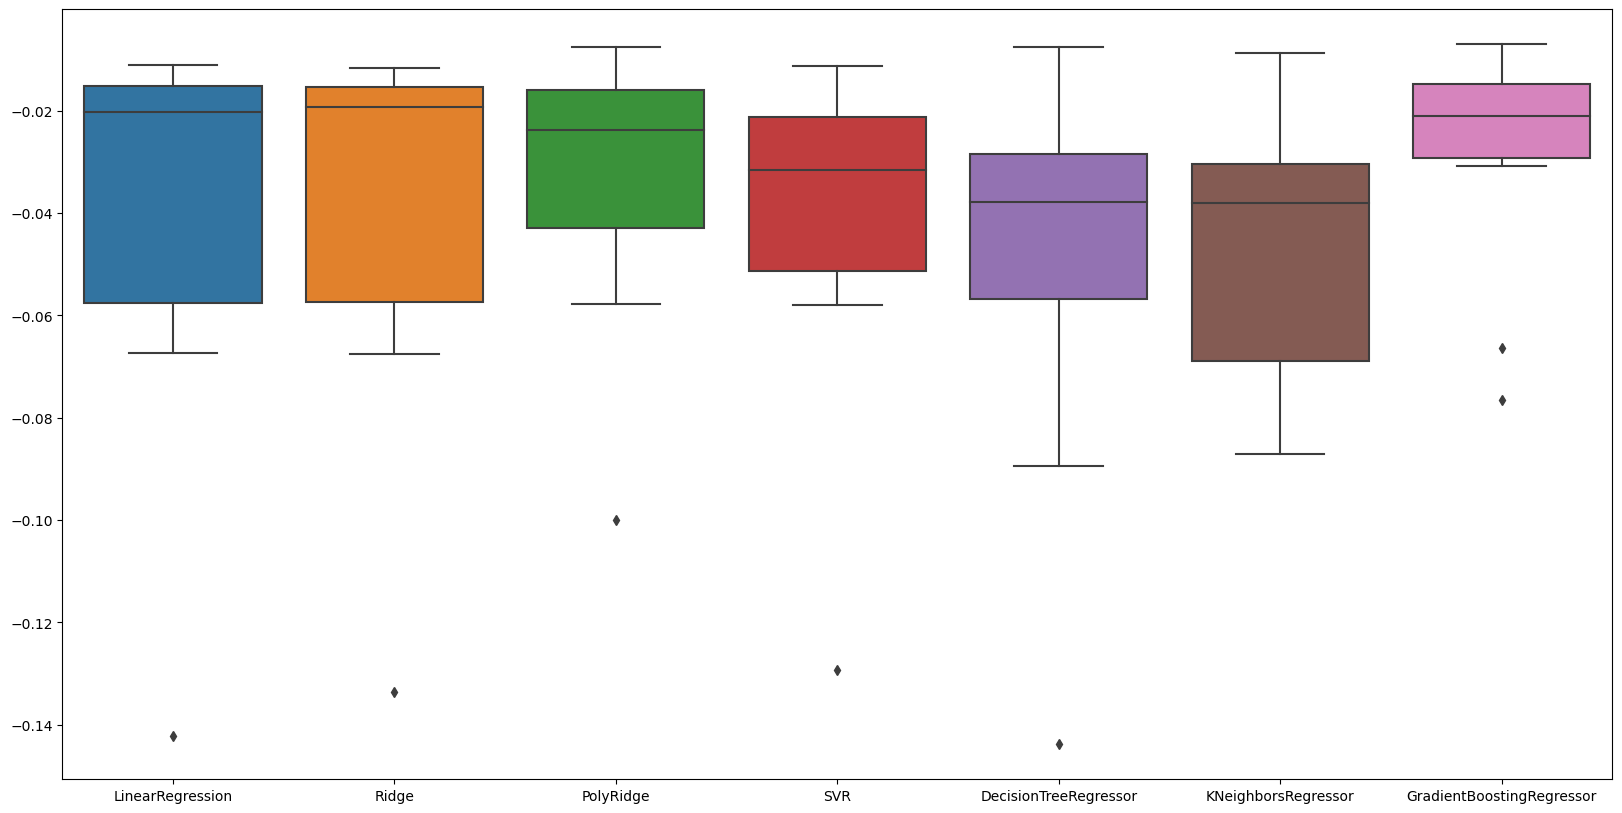

In [47]:
plt.figure(figsize=(20, 10))
scores_mapping = pd.DataFrame(scores_mapping)
sns.boxplot(data=scores_mapping)

__The models SVR and GradientBoostingRegressor exhibit superior performance with MSE scores of -11.62 (+/- 5.91) and -12.39 (+/- 5.86), respectively.__

---

I would like to express my gratitude to https://www.kaggle.com/vikrishnan for providing the dataset and their well-written kernel, which has been immensely helpful in providing valuable insights into this dataset. It has served as an excellent reference for my first kernel.